# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

Aluna: Aurenívia Gomes da Costa

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [62]:
import numpy as np
import pandas as pd
import seaborn as sn
movies = pd.read_csv("movies.csv")\
[['Production Budget', 'US Gross']]\
.dropna()

Visualize os dados com um gráfico de dispersão:

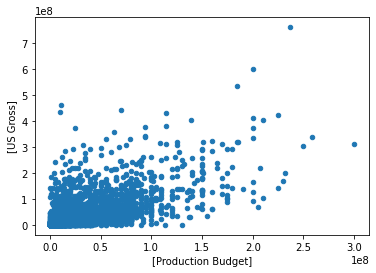

In [54]:
movies.plot.scatter(x=['Production Budget'], y = ['US Gross'])

Use a regressão linear para encontrar os coeficientes a e b:

In [55]:
from scipy.stats import linregress
result = linregress(movies['Production Budget'], movies['US Gross'])

print(f"f(x) = {result.slope}x + {result.intercept}")

f(x) = 1.0957226466834868x + 9896486.136543602


Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [56]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

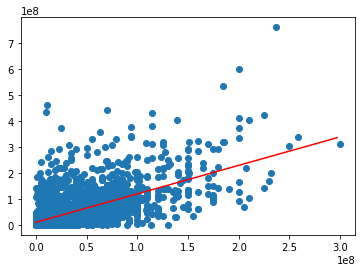

In [57]:
show_regression(movies["Production Budget"], movies["US Gross"], result.slope, result.intercept)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [65]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    '10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.37'
    """
    # ADICIONE O SEU CÓDIGO AQUI    
    f = lambda x: result.slope * x + result.intercept

    return f(production_budget)

## Teste

In [66]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
ok
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    '10992208.78'
ok
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.37'
ok
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
1 items passed all tests:
   3 tests in __main__.predict
3 tests in 4 items.
3 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=3)